# Analyse des Sonnenfleckenzyklus
<div align="right">Rolf Assfalg</div>

In [1]:
import pandas as pd
df =pd.read_json("https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json")

In [2]:
df

,time-tag,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
0,1749-01,96.7,-1.0,-1.00,-1.0,-1.00,-1.0
1,1749-02,104.3,-1.0,-1.00,-1.0,-1.00,-1.0
2,1749-03,116.7,-1.0,-1.00,-1.0,-1.00,-1.0
3,1749-04,92.8,-1.0,-1.00,-1.0,-1.00,-1.0
4,1749-05,141.7,-1.0,-1.00,-1.0,-1.00,-1.0
...,...,...,...,...,...,...,...
3293,2023-06,160.5,-1.0,140.57,-1.0,162.39,-1.0
3294,2023-07,159.1,-1.0,143.65,-1.0,177.53,-1.0
3295,2023-08,114.8,-1.0,99.87,-1.0,153.92,-1.0
3296,2023-09,133.6,-1.0,129.93,-1.0,155.74,-1.0


In [3]:
from datetime import datetime
for index, row in df.iterrows():
    df.at[index, "Date"] = datetime.strptime(row["time-tag"], '%Y-%m')


In [4]:
df

,time-tag,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7,Date
0,1749-01,96.7,-1.0,-1.00,-1.0,-1.00,-1.0,1749-01-01
1,1749-02,104.3,-1.0,-1.00,-1.0,-1.00,-1.0,1749-02-01
2,1749-03,116.7,-1.0,-1.00,-1.0,-1.00,-1.0,1749-03-01
3,1749-04,92.8,-1.0,-1.00,-1.0,-1.00,-1.0,1749-04-01
4,1749-05,141.7,-1.0,-1.00,-1.0,-1.00,-1.0,1749-05-01
...,...,...,...,...,...,...,...,...
3293,2023-06,160.5,-1.0,140.57,-1.0,162.39,-1.0,2023-06-01
3294,2023-07,159.1,-1.0,143.65,-1.0,177.53,-1.0,2023-07-01
3295,2023-08,114.8,-1.0,99.87,-1.0,153.92,-1.0,2023-08-01
3296,2023-09,133.6,-1.0,129.93,-1.0,155.74,-1.0,2023-09-01


(-6209.0, 19358.0)

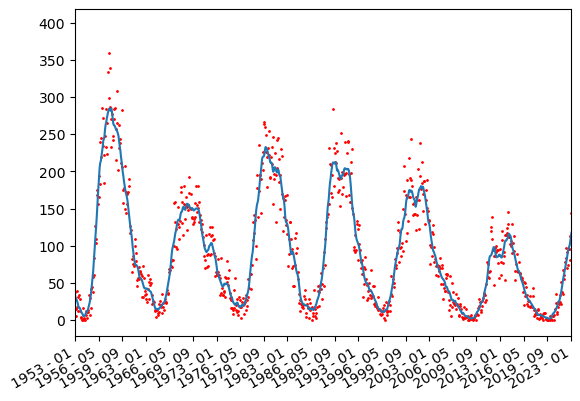

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date

plt.scatter(df['Date'], df['ssn'],s=1,c='red')
plt.plot(df['Date'], df['smoothed_ssn'])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y - %m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=40))
plt.gcf().autofmt_xdate()

plt.xlim(date(1953, 1, 1),date(2023, 1, 1))



In [7]:
x = df['ssn']
#x = df['smoothed_ssn']
f_s = len(df)

N = f_s

(0.0, 100.0)

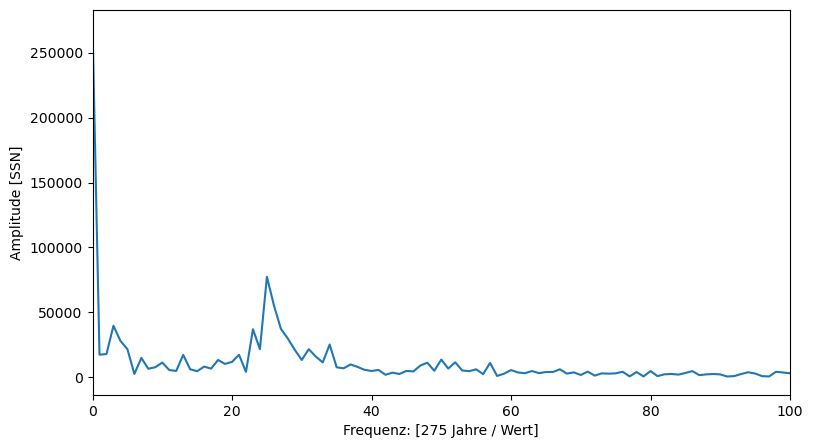

In [8]:
import numpy as np
#Spektrum plotten

#w = np.hamming(N)
X = np.fft.fft(x) # Ohne Hamming Window
plt.figure(figsize=(9,5))
from dateutil.relativedelta import relativedelta
xwerte = np.linspace(0,f_s*(N-1)/N, N)
plt.plot(xwerte, np.abs(X)) # Ohne Logarithmierung
plt.xlabel("Frequenz: [275 Jahre / Wert]")
plt.ylabel("Amplitude [SSN]")
#plt.xlim([0,np.int64((len(df)) / 2)]) #alles
plt.xlim([0,100]) 
